# Finite Leading Edge and Trailing Edge Validation

> Date: 08/05/2025

> Author: Elias Aoubala

In [14]:
from turborocket.profiling.Supersonic.fixed_edge import *
from turborocket.profiling.Supersonic.circular import M_star, inv_M_star
import matplotlib.pyplot as plt
from turborocket.solvers.solver import adjoint

import numpy as np

## 1 - Background

This document is used for the validation of the finite leading edge and trailing edge models intended to be used for the design of the supersonic turbine.

For this, a simple shock and continuity relationship has been used to evaluate the performance of the system, as described in the paper by `Boxer et al.`

## 2 - Theory Application

Two countour plots will be made:

1. Variation of Relative Inlet Angle and Mach Number for a fixed Inlet Blade Angle.
2. Variation of Relative Inlet Angle and Metal Blade Angle for a fixed Inlet Mach Number.

### 2.1 - Plot 1: Variaiton of inlet angle and Mach Number for a fixed Metal Angle

In [30]:
ANGLE_CONVERSION = np.pi / 180

beta_m = 60 * ANGLE_CONVERSION

gamma = 1.1

We can optimise our adjoint solver

In [44]:
M_i = np.linspace(1.2, 2.8, 20)
beta_i = np.linspace(60, 80, 20) * ANGLE_CONVERSION

M_e = np.zeros([M_i.size, beta_i.size])

t_g_star = 0

M_i, beta_i = np.meshgrid(M_i, beta_i)

M_star_i = M_star(gamma=gamma, M=M_i)

for index, x in np.ndenumerate(M_star_i):

    M_star_a = M_star_i[index]
    beta = beta_i[index]

    # print(M_star_a)
    M_star_e = get_m_star_e(
        t_g_rat=t_g_star, beta_e=beta_m, beta_i=beta, M_star_i=M_star_a, gamma=gamma
    )

    M_e[index] = inv_M_star(gamma=gamma,M_star=M_star_e)

()


Text(0, 0.5, 'Turbine Inlet Angle (Degrees)')

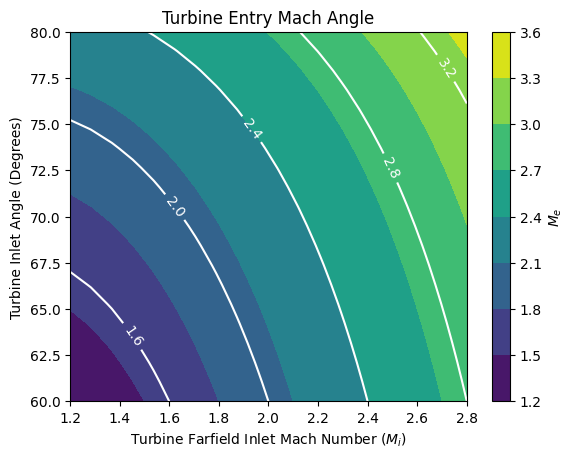

In [45]:
print(M_star_e.shape)


a = plt.contourf(M_i, beta_i / ANGLE_CONVERSION, M_e)
b = plt.contour(M_i, beta_i / ANGLE_CONVERSION, M_e, levels = 5, colors="w")
plt.title("Turbine Entry Mach Angle")

cbar = plt.colorbar(a)
cbar.set_label(r"$M_e$")

plt.clabel(b, b.levels, fontsize=10)

plt.xlabel("Turbine Farfield Inlet Mach Number ($M_i$)")
plt.ylabel("Turbine Inlet Angle (Degrees)")
# plt.axhline(beta_m / ANGLE_CONVERSION)

### 2.2 - Plot 2: Variation of Inlet Angle and Metal Blade Angle for a fixed Inlet Mach Number